In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle

In [2]:
data = '../data/kc_house_data.csv'
df = pd.read_csv(data)

In [3]:
print(df.shape)

(10094, 12)


In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,770,0,1933,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0


In [5]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== DUPLICATES DỰA TRÊN ID ===")
print("Số bản ghi trùng id:", df['id'].duplicated().sum())


=== MISSING VALUES ===
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

=== DUPLICATES DỰA TRÊN ID ===
Số bản ghi trùng id: 85


In [6]:
key_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
               'floors', 'yr_built', 'yr_renovated']

print(df[key_columns].describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.009400e+04  10094.000000  10094.000000  10094.000000  1.009400e+04   
mean   5.329668e+05      3.361997      2.061769   2051.897662  1.597566e+04   
std    3.760633e+05      0.915712      0.766330    910.533602  4.484170e+04   
min    7.500000e+04      0.000000      0.000000    380.000000  5.720000e+02   
25%    3.150000e+05      3.000000      1.500000   1410.000000  5.428000e+03   
50%    4.458190e+05      3.000000      2.000000   1890.000000  7.918500e+03   
75%    6.390000e+05      4.000000      2.500000   2500.000000  1.113875e+04   
max    7.700000e+06     11.000000      8.000000  12050.000000  1.651359e+06   

             floors      yr_built  yr_renovated  
count  10094.000000  10094.000000  10094.000000  
mean       1.431989   1967.260848     91.570240  
std        0.512459     27.982646    417.671925  
min        1.000000   1900.000000      0.000000  
25%        1.000000   1950.000000     


--- PRICE ---
count    1.009400e+04
mean     5.329668e+05
std      3.760633e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.458190e+05
75%      6.390000e+05
max      7.700000e+06
Name: price, dtype: float64


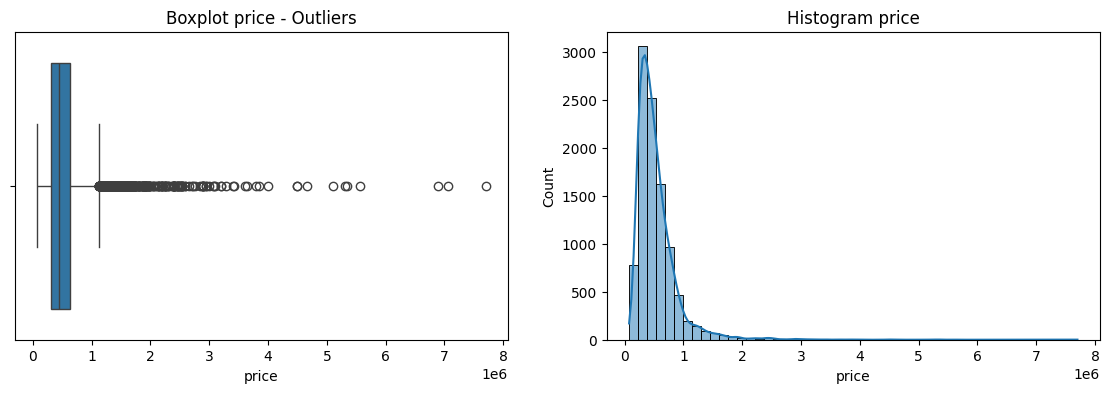


--- BEDROOMS ---
count    10094.000000
mean         3.361997
std          0.915712
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


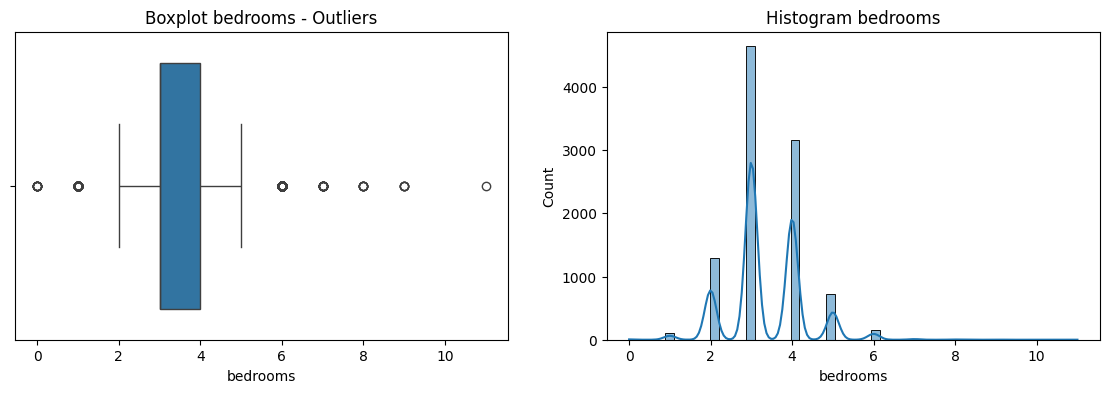


--- BATHROOMS ---
count    10094.000000
mean         2.061769
std          0.766330
min          0.000000
25%          1.500000
50%          2.000000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


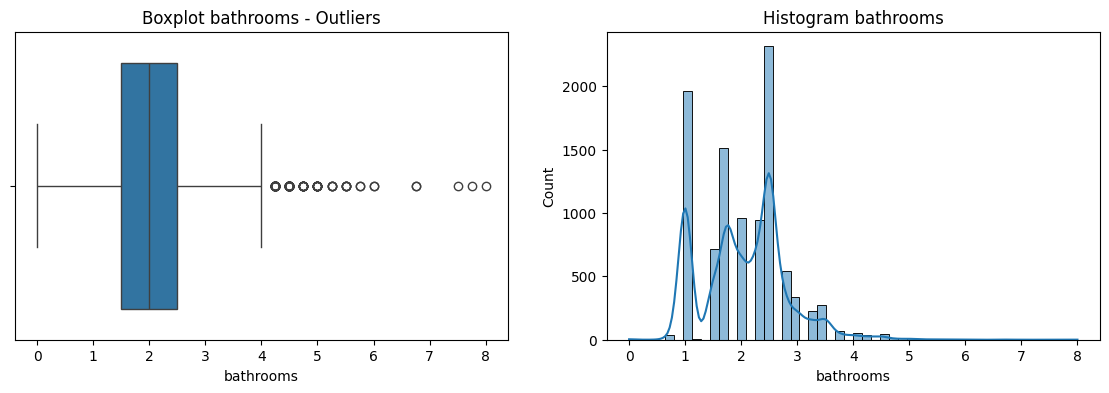


--- SQFT_LIVING ---
count    10094.000000
mean      2051.897662
std        910.533602
min        380.000000
25%       1410.000000
50%       1890.000000
75%       2500.000000
max      12050.000000
Name: sqft_living, dtype: float64


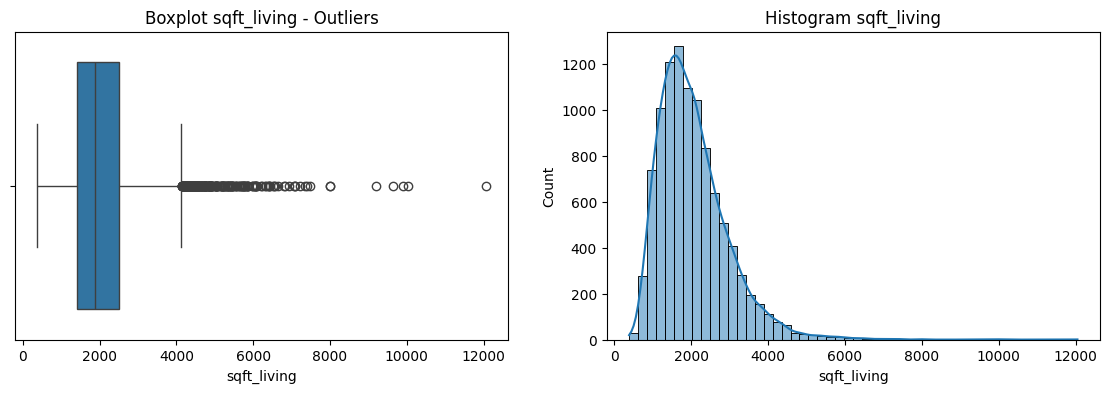


--- SQFT_LOT ---
count    1.009400e+04
mean     1.597566e+04
std      4.484170e+04
min      5.720000e+02
25%      5.428000e+03
50%      7.918500e+03
75%      1.113875e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


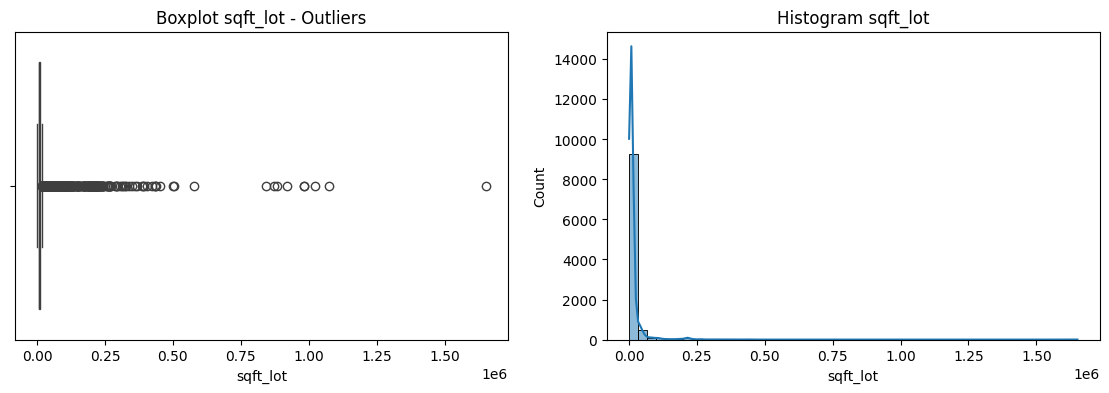


--- FLOORS ---
count    10094.000000
mean         1.431989
std          0.512459
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


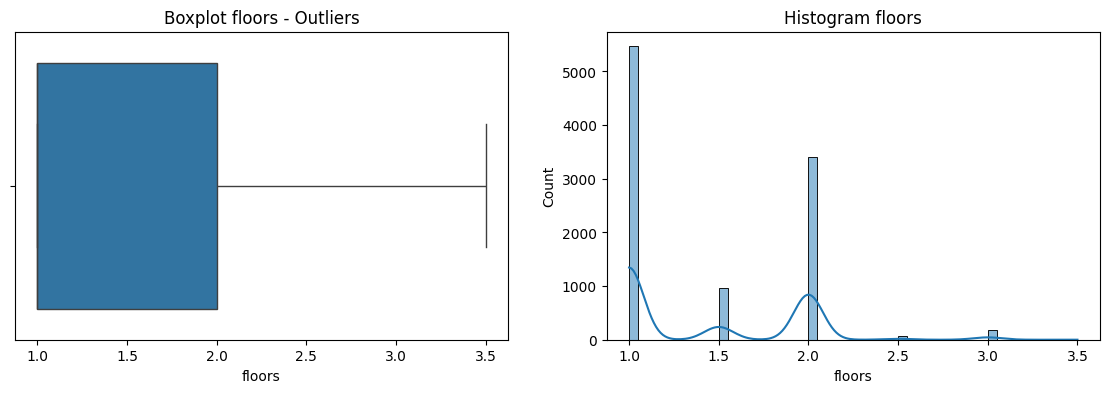


--- YR_BUILT ---
count    10094.000000
mean      1967.260848
std         27.982646
min       1900.000000
25%       1950.000000
50%       1969.000000
75%       1990.000000
max       2015.000000
Name: yr_built, dtype: float64


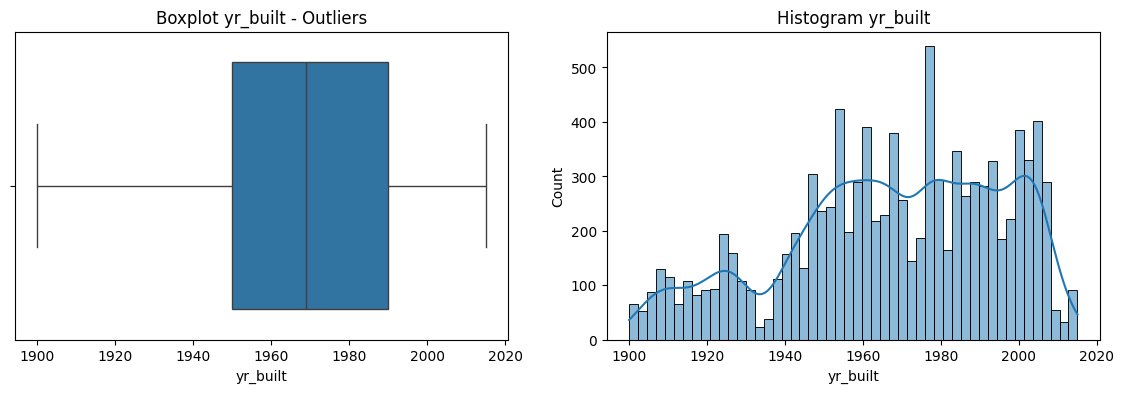

In [7]:
key_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

for col in key_columns:
    print(f"\n--- {col.upper()} ---")
    print(df[col].describe())

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

    # Boxplot
    sns.boxplot(x=df[col], ax=ax1)
    ax1.set_title(f'Boxplot {col} - Outliers')

    # Histogram + KDE
    sns.histplot(df[col], kde=True, bins=50, ax=ax2)
    ax2.set_title(f'Histogram {col}')

    plt.show()

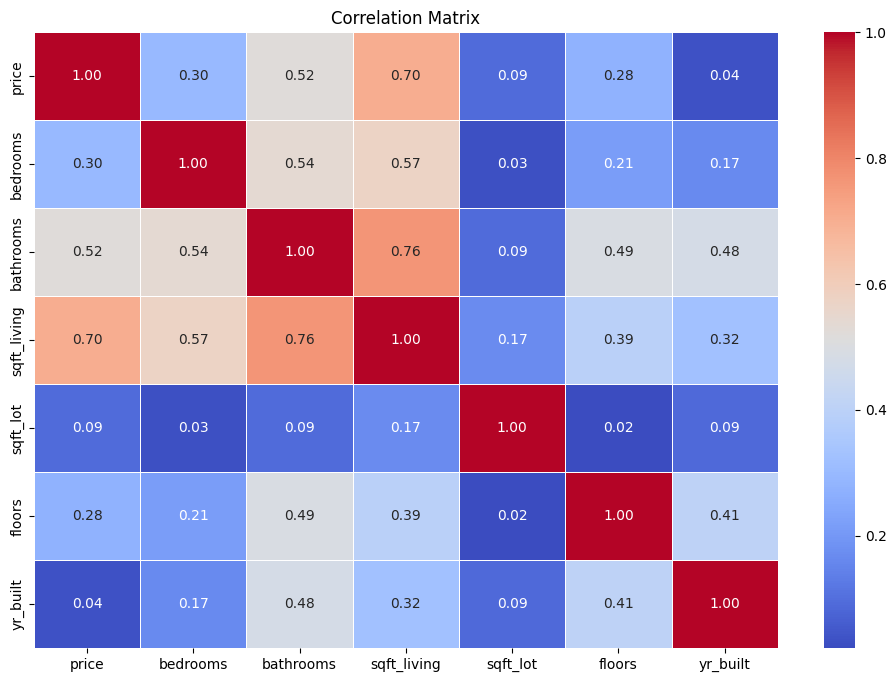

Các cặp có tương quan cao (|corr| > 0.7):
price        sqft_living    0.702103
bathrooms    sqft_living    0.764110
sqft_living  price          0.702103
             bathrooms      0.764110
dtype: float64


In [8]:
key_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
               'floors', 'yr_built']

plt.figure(figsize=(12, 8))
corr = df[key_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print("Các cặp có tương quan cao (|corr| > 0.7):")
high_corr = corr[(abs(corr) > 0.7) & (corr != 1.0)].stack()
print(high_corr)

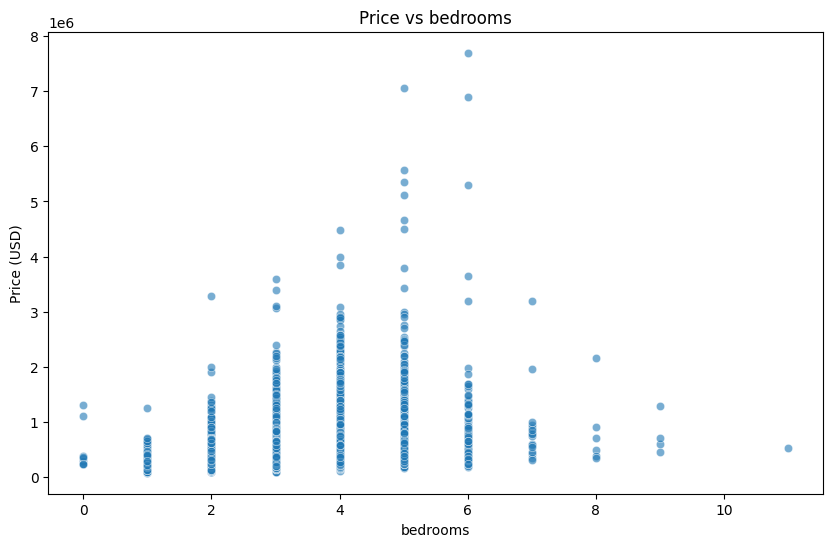

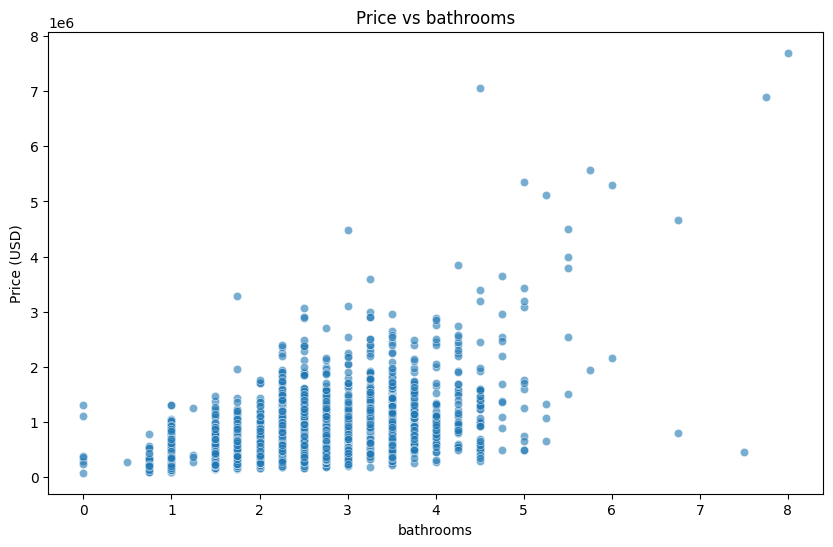

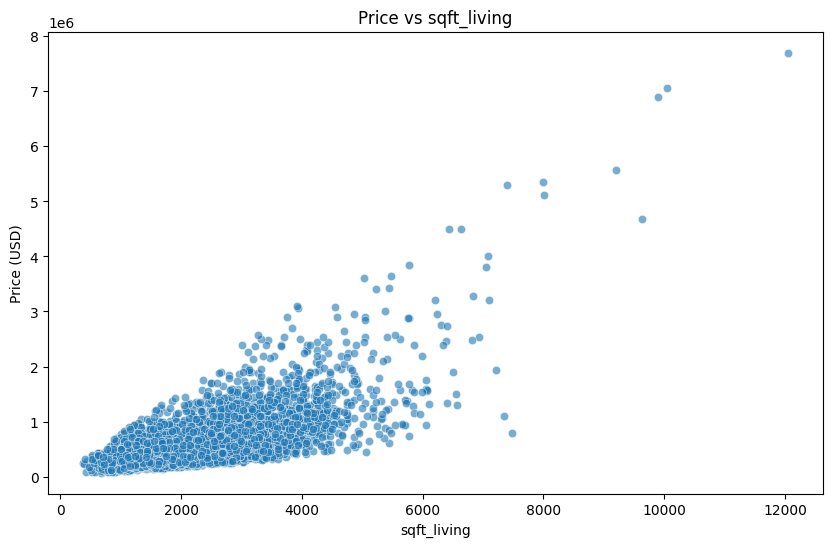

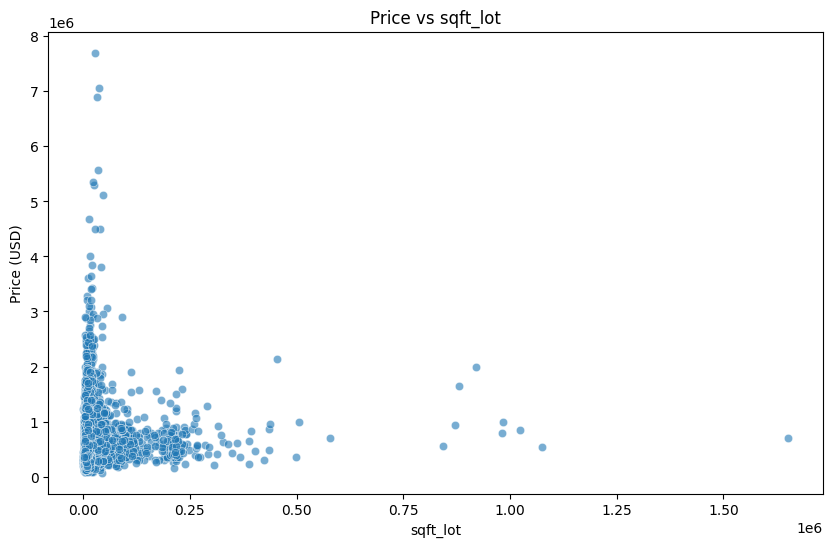

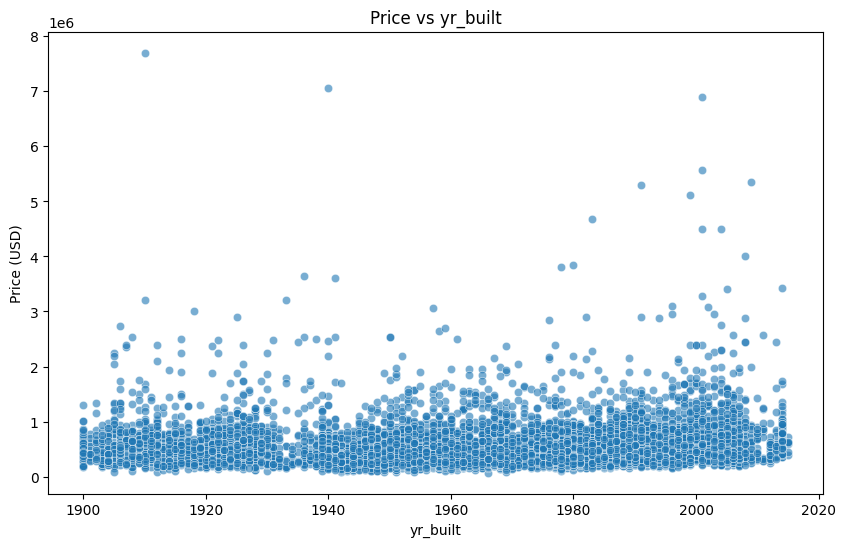

In [9]:
scatter_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

for col in scatter_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='price', alpha=0.6)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price (USD)')
    plt.show()

In [39]:
# 2. Làm sạch dữ liệu
df['price'] = df['price'].astype(float)
df = df.drop_duplicates(subset=['id'])
df = df[(df['bedrooms'] <= 10) & (df['sqft_living'] <= 10000) & (df['price'] <= 5000000)]

# 3. Chọn cột & chuẩn hóa
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
target = 'price'

df_processed = df[features + [target]].copy()

In [40]:
scaler = StandardScaler()
df_processed[features] = scaler.fit_transform(df_processed[features])


In [41]:
X = df_processed[features]
y = df_processed[target]

# 4. Chia train/test (15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print(f"Mean R² (CV): {cv_scores.mean():.4f}")

Cross-validation R² scores: [0.58155123 0.56831897 0.55083327 0.47572223 0.58756185]
Mean R² (CV): 0.5528


In [43]:
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [46]:
# 7. Dự đoán và đánh giá trên test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [51]:
# print(f"Test RMSE: {rmse:.4f}")
print(f" Test R²: {r2:.4f}")

 Test R²: 0.5703


C:\Users\hieuh\AppData\Local\Temp\ipykernel_1956\3708952225.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\uel\HỌC KÌ 9\Big data & Application\assignment\House_Price_Prediction_K22\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


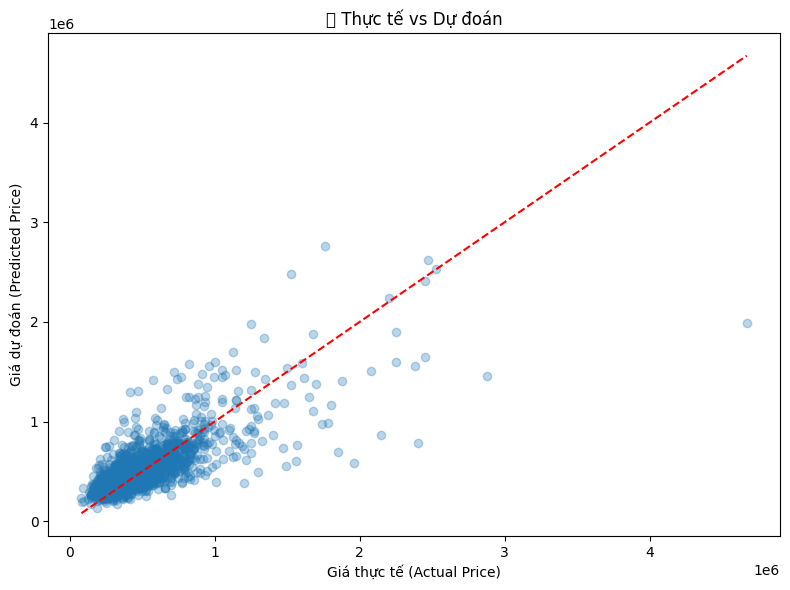

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Giá thực tế (Actual Price)")
plt.ylabel("Giá dự đoán (Predicted Price)")
plt.title("Thực tế vs Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường y = x
plt.tight_layout()
plt.show()


C:\Users\hieuh\AppData\Local\Temp\ipykernel_1956\1129379457.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\uel\HỌC KÌ 9\Big data & Application\assignment\House_Price_Prediction_K22\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


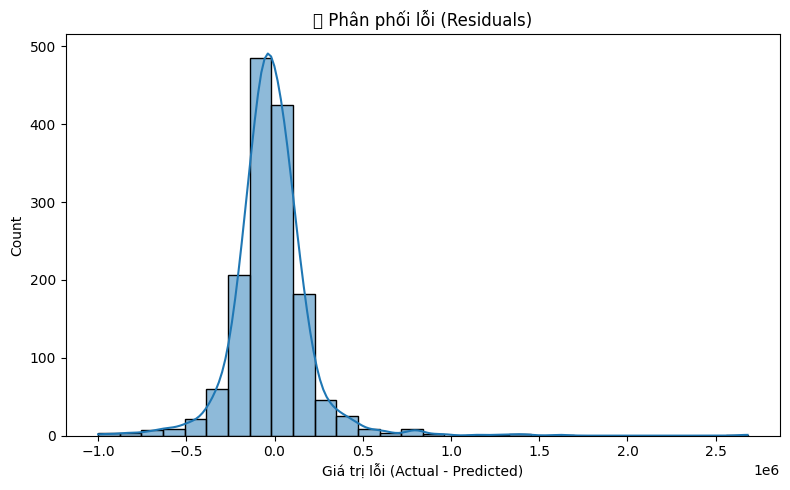

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Phân phối lỗi (Residuals)")
plt.xlabel("Giá trị lỗi (Actual - Predicted)")
plt.tight_layout()
plt.show()


C:\Users\hieuh\AppData\Local\Temp\ipykernel_1956\345833805.py:7: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


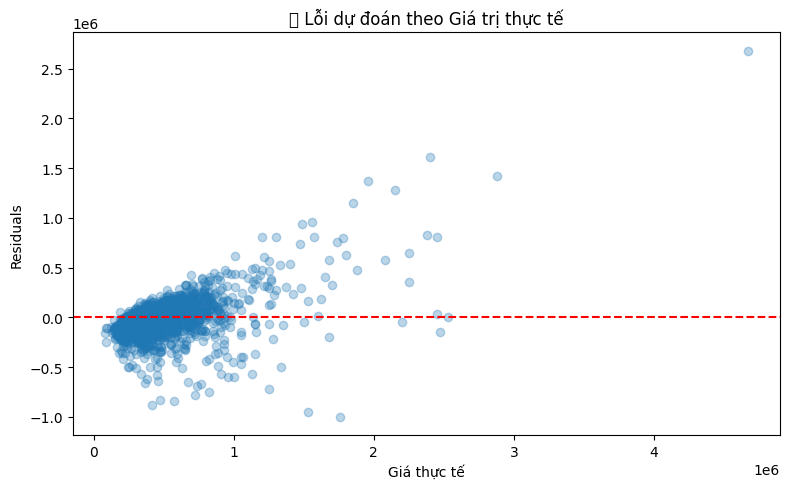

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Giá thực tế")
plt.ylabel("Residuals")
plt.title("Lỗi dự đoán theo Giá trị thực tế")
plt.tight_layout()
plt.show()


C:\Users\hieuh\AppData\Local\Temp\ipykernel_1956\1543700168.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\uel\HỌC KÌ 9\Big data & Application\assignment\House_Price_Prediction_K22\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


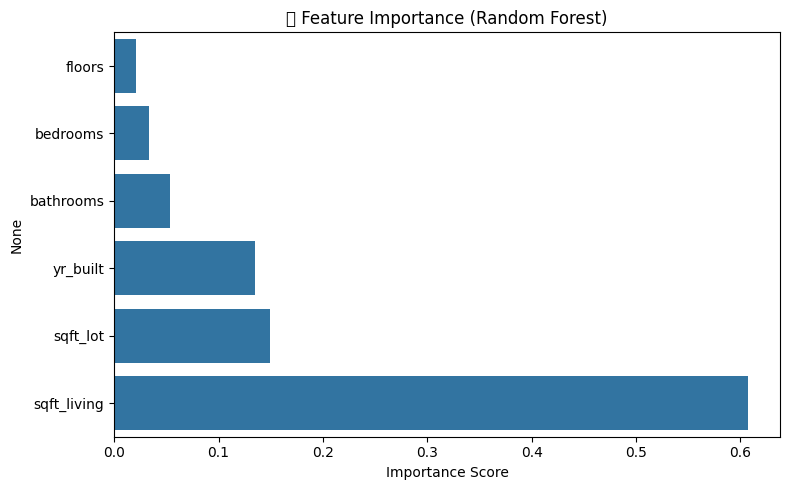

In [ ]:
# 8. Feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [54]:
# Lưu scaler
with open("../model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
#Lưu model
with open("../model/model.pkl", "wb") as f:
    pickle.dump(model, f)